In this hackathon, we are providing you with data from thousands of restaurants in India regarding the time they take to deliver food for online order. As data scientists, your goal is to predict the online order delivery time based on the given factors.

Size of training set: 11,094 records

Size of test set: 2,774 records

FEATURES:

* Restaurant: A unique ID that represents a restaurant.
* Location: The location of the restaurant.
* Cuisines: The cuisines offered by the restaurant.
* Average_Cost: The average cost for one person/order.
* Minimum_Order: The minimum order amount.
* Rating: Customer rating for the restaurant.
* Votes: The total number of customer votes for the restaurant.
* Reviews: The number of customer reviews for the restaurant.
* Delivery_Time: The order delivery time of the restaurant. (Target Classes) 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# Importing the Dataset
train = pd.read_excel("./Downloads/Food Prices/Participants Data/Data_Train.xlsx")
test = pd.read_excel("./Downloads/Food Prices/Participants Data/Data_Test.xlsx")

In [14]:
train.head()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
0,ID_6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",₹200,₹50,3.5,12,4,30 minutes
1,ID_2882,"Sector 3, Marathalli","Ice Cream, Desserts",₹100,₹50,3.5,11,4,30 minutes
2,ID_1595,Mumbai Central,"Italian, Street Food, Fast Food",₹150,₹50,3.6,99,30,65 minutes
3,ID_5929,"Sector 1, Noida","Mughlai, North Indian, Chinese",₹250,₹99,3.7,176,95,30 minutes
4,ID_6123,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",₹200,₹99,3.2,521,235,65 minutes


### Observations from the Data

1. Location and Cuisines - Need Cleaning

2. We need to Generalize the Location and Cuisines

3. Cleaning needs to be done for Avg Cost and Min Price

4. Delivery Time is mentioned in Categories. Ideally it should be Numeric. This means we need to remove the "Minutes" from the Target

### Exploratory Data Analysis

#### 1. Univariate Analysis - Single variable Analysis

Numerical Column - Histogram. 

What is a Histogram?
Histogram is a statistical plot that defines the shape of the data. If the data is not normal then the histogram will show a skewed curve. Here skewness is result of the presence of outliers in the data. Hence, mean, median and mode will never be equal. 

Having Said that, If Mean> Median> Mode : +vely Skewed Data and vice versa.


Categorical Column - barplot/countplot

#### 2. Bivariate Analysis - Predictor variable vs Target Variable

* Numerica Vs Numerica -Scatterplot
* Categorical vs Numerical - Boxplot (aka Box and Whisker Plot) Min, Max, 25%, 50%, 75%. IQR(75%-25%)
* Categorical Vs Categorical - table | pd.crosstab()

#### 3. Missing Value Imputation

#### 4. Feature Engineering

#### 5. Scaling the Dataset

Why do you scale the data?

To Bring the Data in a certain range so that the computation or the Pattern Recognition from the ML Algo angle becomes easy.

Also, to bring the data in same scale so that the mean of the data becomes 0 and SD becomes 1.

### Preprocessing Stage - We get into Modelling

In [16]:
combined = pd.concat([train,test], sort = False, ignore_index = True)

In [18]:
combined.tail()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
13863,ID_6342,Delhi University-GTB Nagar,"Fast Food, Chinese",₹100,₹50,NEW,-,-,NaN
13864,ID_8495,"Mico Layout, Stage 2, BTM Layout,Bangalore","Continental, North Indian, Desserts, Beverages",₹250,₹50,3.1,5,1,NaN
13865,ID_7122,"Noorkhan Bazaar, Malakpet, Hyderabad","Andhra, South Indian",₹150,₹50,3.0,16,1,NaN
13866,ID_2475,"D-Block, Sector 63, Noida",Bakery,₹100,₹99,3.0,7,2,NaN
13867,ID_1595,"Dockyard Road, Mumbai CST Area","Italian, Street Food, Fast Food",₹150,₹50,3.6,99,30,NaN


In [19]:
combined.Delivery_Time.value_counts()

30 minutes     7406
45 minutes     2665
65 minutes      923
120 minutes      62
20 minutes       20
80 minutes       14
10 minutes        4
Name: Delivery_Time, dtype: int64

In [33]:
# Location
combined.Location[182].split(", ")[-1]

'Gurgoan'

In [34]:
# loop
locs = []
for i in combined.Location:
    locs.append(i.split(", ")[-1])

In [37]:
# Add into combined columns
combined["Locs_Cleansed"]=pd.Series(locs)

In [40]:
combined.Locs_Cleansed.unique()

array(['Pune', 'Marathalli', 'Mumbai Central', 'Noida', 'Whitefield',
       'Delhi University-GTB Nagar', 'Maharashtra', 'Timarpur', 'Kolkata',
       'Mumbai CST Area', 'Pune University', 'BTM Layout,Bangalore',
       'Gurgoan', 'Begumpet', 'Majestic', 'India Gate', 'Hyderabad',
       'Sector 63A,Gurgaon', 'Delhi Cantt.', 'Mumbai', 'Delhi',
       'Electronic City'], dtype=object)

In [51]:
combined.Locs_Cleansed.value_counts()

Noida                         2647
Pune                          1719
BTM Layout,Bangalore          1158
Mumbai CST Area                825
Delhi University-GTB Nagar     699
Kolkata                        678
Gurgoan                        611
Timarpur                       602
Whitefield                     585
Mumbai Central                 578
India Gate                     504
Marathalli                     444
Majestic                       411
Delhi Cantt.                   397
Maharashtra                    379
Hyderabad                      371
Pune University                344
Delhi                          337
Sector 63A,Gurgaon             323
Mumbai                         133
Begumpet                        93
Bangalore                       30
Name: Locs_Cleansed, dtype: int64

Further Cleaning is required in Following Cases:

1. Checking City for Electronic City and Make Imputations acc.

2. Delhi University GTB Nagar

3. Sector 63A,Gurgaon

4. Spell Correction Needed for Gurgaon City

5. India Gate

6. BTM Layout bangalore

7. Pune University

8. Marathalli, Majestic and Whitefield Impute Bengaluru

9. Change Begumpet to Hyderabad

10. Check mahrasthra

In [48]:
# Point 1
combined[combined.Locs_Cleansed=="Electronic City"]["Location"]

Series([], Name: Location, dtype: object)

In [47]:
# Replacing the Electronic City with Bangalore
combined.loc[combined.Locs_Cleansed=="Electronic City", 
             "Locs_Cleansed"]="Bangalore"

In [53]:
# Replacing Whitefield, Marathalli, Majestic, BTM Layout,Bangalore
listtoreplace = ["Whitefield", "Marathalli", "Majestic", "BTM Layout,Bangalore"]
combined.Locs_Cleansed.replace(to_replace=listtoreplace,
                              value = ["Bangalore"]*4, inplace = True)

In [55]:
# Delhi University
listtoreplace = ["Timarpur","Delhi Cantt.", 
                 "India Gate", "Delhi University-GTB Nagar"]
combined.Locs_Cleansed.replace(to_replace=listtoreplace,
                              value = ["Delhi"]*4, inplace = True)

In [74]:
combined.Locs_Cleansed.unique()

array(['Pune', 'Bangalore', 'Mumbai', 'Noida', 'Delhi', 'Kolkata',
       'Gurgaon', 'Hyderabad'], dtype=object)

7. Pune University

9. Change Begumpet to Hyderabad

10. Check mahrasthra

In [57]:
# Mumbai
listtoreplace = ["Mumbai Central","Mumbai CST Area", ]
combined.Locs_Cleansed.replace(to_replace=listtoreplace,
                              value = ["Mumbai"]*2, inplace = True)

In [62]:
# Gurgaon
listtoreplace = ["Gurgoan","Sector 63A,Gurgaon"] 
combined.Locs_Cleansed.replace(to_replace=listtoreplace,
                              value = ["Gurgaon"]*2, inplace = True)

In [68]:
# Begumpet
combined.loc[combined.Locs_Cleansed=="Begumpet","Locs_Cleansed"]="Hyderabad"

In [73]:
# Pune and Mahrashtra
combined.Locs_Cleansed.replace(to_replace=["Maharashtra", "Pune University"],
                              value = ["Pune"]*2, inplace = True)

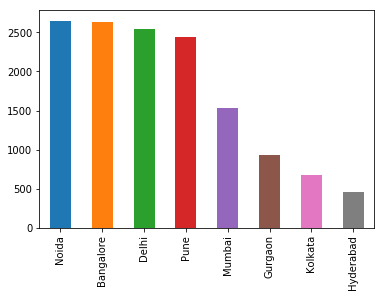

In [75]:
combined.Locs_Cleansed.value_counts().plot(kind = "bar")

#### Majority of Orders are coming from Noida, Bangalore, Delhi and Pune.
#### Hyderabad is the lowest

In [76]:
# Cuisines
combined.Cuisines.unique()

array(['Fast Food, Rolls, Burger, Salad, Wraps', 'Ice Cream, Desserts',
       'Italian, Street Food, Fast Food', ...,
       'North Indian, Chinese, Japanese',
       'Asian, Italian, Continental, Desserts, Healthy Food',
       'North Indian, Rolls, Chinese, Continental, Fast Food'],
      dtype=object)

In [78]:
combined.Cuisines[0].split(",")

['Fast Food', ' Rolls', ' Burger', ' Salad', ' Wraps']

In [110]:
cuisines =[]
for i in combined.Cuisines:
    cuisines.append(i.split(", "))

In [123]:
df = pd.DataFrame(cuisines)

In [124]:
df.head()

,0,1,2,3,4,5,6,7
0,Fast Food,Rolls,Burger,Salad,Wraps,None,None,None
1,Ice Cream,Desserts,None,None,None,None,None,None
2,Italian,Street Food,Fast Food,None,None,None,None,None
3,Mughlai,North Indian,Chinese,None,None,None,None,None
4,Cafe,Beverages,None,None,None,None,None,None


In [96]:
cuisinezero = df[0].unique()

In [113]:
# Chcking First Col value with 3rd col
def findcuisines(x):
    if x in cuisinezero:
        return("Found")
    else:
        return("NF")

In [127]:
df["var"] = df[1].apply(findcuisines)

In [144]:
df[0].unique()

array(['Fast Food', 'Ice Cream', 'Italian', 'Mughlai', 'Cafe',
       'South Indian', 'Beverages', 'Chinese', 'Mithai', 'North Indian',
       'Burger', 'Biryani', 'Kerala', 'Desserts', 'Bakery', 'Asian',
       'Street Food', 'Pizza', 'Lucknowi', 'Tea', 'Rolls', 'Bengali',
       'Mishti', 'European', 'Momos', 'Continental', 'Andhra', 'German',
       'Finger Food', 'Sandwich', 'Chettinad', 'Juices', 'Parsi',
       'Japanese', 'Salad', 'Tamil', 'North Eastern', 'Maharashtrian',
       'Tibetan', 'Arabian', 'Bar Food', 'Konkan', 'Odia', 'Paan',
       'Wraps', 'Lebanese', 'American', 'Mediterranean', 'Bohri',
       'Mangalorean', 'Thai', 'Healthy Food', 'Raw Meats', 'Gujarati',
       'Seafood', 'Rajasthani', 'BBQ', 'Coffee', 'Mexican', 'Goan',
       'Korean', 'Kebab', 'Kashmiri', 'Bihari', 'Portuguese',
       'Frozen Yogurt', 'Afghan', 'Awadhi', 'Malwani', 'Malaysian',
       'Hyderabadi', 'French', 'Modern Indian', 'Sushi', 'Hot dogs',
       'Iranian', 'Brazilian', 'Indian', 'Af

In [108]:
foodlist = ['Fast Food', 'Ice Cream', 'Italian', 'Mughlai', 'Cafe',
       'South Indian', 'Beverages', 'Chinese', 'Mithai', 'North Indian',
       'Burger', 'Biryani', 'Kerala', 'Desserts', 'Bakery', 'Asian',
       'Street Food', 'Pizza', 'Lucknowi', 'Tea', 'Rolls', 'Bengali',
       'Mishti', 'European', 'Momos', 'Continental', 'Andhra', 'German',
       'Finger Food', 'Sandwich', 'Chettinad', 'Juices', 'Parsi',
       'Japanese', 'Salad', 'Tamil', 'North Eastern', 'Maharashtrian',
       'Tibetan', 'Arabian', 'Bar Food', 'Konkan', 'Odia', 'Paan',
       'Wraps', 'Lebanese', 'American', 'Mediterranean', 'Bohri',
       'Mangalorean', 'Thai', 'Healthy Food', 'Raw Meats', 'Gujarati',
       'Seafood', 'Rajasthani', 'BBQ', 'Coffee', 'Mexican', 'Goan',
       'Korean', 'Kebab', 'Kashmiri', 'Bihari', 'Portuguese',
       'Frozen Yogurt', 'Afghan', 'Awadhi', 'Malwani', 'Malaysian',
       'Hyderabadi', 'French', 'Modern Indian', 'Sushi', 'Hot dogs',
       'Iranian', 'Brazilian', 'Indian', 'African', 'Bubble Tea',
       'Turkish', 'Assamese', 'Naga', 'Middle Eastern', 'Vietnamese',
       'Steak']

In [148]:
deserts = ['Ice Cream','Mithai','Mishti','Desserts',
          'Frozen Yogurt', 'Paan']

beverages = ['Beverages', 'Tea','Coffee','Bubble Tea','Juices']

fastfood = ['Fast Food','Cafe','Burger','Street Food','Bakery',
           'Pizza', "Rolls",'Momos','Finger Food', 'Sandwich','Wraps',
           'Bar Food', 'Hot dogs']

maincourse = ['Italian', 'Mughlai','South Indian','Chinese','North Indian',
       'Biryani', 'Kerala', 'Asian','Lucknowi', 'Bengali',
       'European', 'Continental', 'Andhra', 'German',
      'Chettinad', 'Parsi','Japanese', 'Salad', 'Tamil', 'North Eastern', 
    'Maharashtrian','Tibetan', 'Arabian', 'Konkan', 'Odia',
       'Lebanese', 'American', 'Mediterranean', 'Bohri',
       'Mangalorean', 'Thai', 'Healthy Food', 'Raw Meats', 'Gujarati',
       'Seafood', 'Rajasthani', 'BBQ', 'Mexican', 'Goan',
       'Korean', 'Kebab', 'Kashmiri', 'Bihari', 'Portuguese',
       'Afghan', 'Awadhi', 'Malwani', 'Malaysian',
       'Hyderabadi', 'French', 'Modern Indian', 'Sushi', 
       'Iranian', 'Brazilian', 'Indian', 'African',
       'Turkish', 'Assamese', 'Naga', 'Middle Eastern', 'Vietnamese',
       'Steak']

In [149]:
# Make a Function
def cuisinedekho(x):
    if(x in deserts):
        return("Deserts")
    elif(x in beverages):
        return("Beverages")
    elif(x in fastfood):
        return("FastFood")
    else:
        return("Main Course")

In [151]:
combined["Cuisine_Cleansed"] = df[0].apply(cuisinedekho)

In [152]:
combined.head()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time,Locs_Cleansed,Cuisine_Cleansed
0,ID_6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",₹200,₹50,3.5,12,4,30 minutes,Pune,FastFood
1,ID_2882,"Sector 3, Marathalli","Ice Cream, Desserts",₹100,₹50,3.5,11,4,30 minutes,Bangalore,Deserts
2,ID_1595,Mumbai Central,"Italian, Street Food, Fast Food",₹150,₹50,3.6,99,30,65 minutes,Mumbai,Main Course
3,ID_5929,"Sector 1, Noida","Mughlai, North Indian, Chinese",₹250,₹99,3.7,176,95,30 minutes,Noida,Main Course
4,ID_6123,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",₹200,₹99,3.2,521,235,65 minutes,Bangalore,FastFood


In [153]:
# Average Cost
combined.Average_Cost.unique()

array(['₹200', '₹100', '₹150', '₹250', '₹650', '₹350', '₹800', '₹50',
       '₹400', '₹600', '₹300', '₹750', '₹450', '₹550', '₹1,000', '₹500',
       '₹900', '₹1,200', '₹950', '₹850', '₹700', '₹1,150', 'for',
       '₹1,100', '₹1,400', '₹2,050'], dtype=object)

In [154]:
combined.loc[combined.Average_Cost=='₹2,050']

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time,Locs_Cleansed,Cuisine_Cleansed
9891,ID_33,"Delhi High Court, India Gate","Continental, North Indian, Italian, Asian","₹2,050",₹50,3.9,671,357,30 minutes,Delhi,Main Course


In [167]:
a = combined.loc[9891,"Average_Cost"].split("₹")[1]

In [173]:
combined.Average_Cost = combined.Average_Cost.str.replace("₹", "")

In [175]:
combined.Average_Cost = combined.Average_Cost.str.replace(",", "")

In [179]:
combined.Average_Cost.unique()

array(['200', '100', '150', '250', '650', '350', '800', '50', '400',
       '600', '300', '750', '450', '550', '1000', '500', '900', '1200',
       '950', '850', '700', '1150', 'for', '1100', '1400', '2050'],
      dtype=object)

In [181]:
combined[combined.Average_Cost=="for"]

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time,Locs_Cleansed,Cuisine_Cleansed
6297,ID_6472,Pune University,Fast Food,for,₹50,NEW,-,-,30 minutes,Pune,FastFood


In [202]:
combined[(combined.Cuisine_Cleansed=="FastFood") & (combined.Locs_Cleansed=="Pune")]["Average_Cost"].describe()

count    891.00000
mean     183.55780
std      112.63754
min       50.00000
25%      100.00000
50%      150.00000
75%      200.00000
max      800.00000
Name: Average_Cost, dtype: float64

In [197]:
combined.Average_Cost = pd.to_numeric(combined.Average_Cost, errors="coerce")

In [206]:
combined[combined.Average_Cost.isnull()]

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time,Locs_Cleansed,Cuisine_Cleansed


In [205]:
combined.loc[combined.Average_Cost.isnull(), "Average_Cost"] = 150

In [208]:
combined.Minimum_Order.unique()

array(['₹50', '₹99', '₹0', '₹200', '₹450', '₹350', '₹79', '₹400', '₹199',
       '₹500', '₹250', '₹150', '₹90', '₹299', '₹300', '₹240', '₹89',
       '₹59', '₹149', '₹399'], dtype=object)

In [209]:
combined.Minimum_Order = combined.Minimum_Order.str.replace("₹", "")

In [212]:
combined.Minimum_Order = combined.Minimum_Order.astype("int")

In [213]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13868 entries, 0 to 13867
Data columns (total 11 columns):
Restaurant          13868 non-null object
Location            13868 non-null object
Cuisines            13868 non-null object
Average_Cost        13868 non-null float64
Minimum_Order       13868 non-null int32
Rating              13868 non-null object
Votes               13868 non-null object
Reviews             13868 non-null object
Delivery_Time       11094 non-null object
Locs_Cleansed       13868 non-null object
Cuisine_Cleansed    13868 non-null object
dtypes: float64(1), int32(1), object(9)
memory usage: 1.1+ MB


In [214]:
combined.head()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time,Locs_Cleansed,Cuisine_Cleansed
0,ID_6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",200.0,50,3.5,12,4,30 minutes,Pune,FastFood
1,ID_2882,"Sector 3, Marathalli","Ice Cream, Desserts",100.0,50,3.5,11,4,30 minutes,Bangalore,Deserts
2,ID_1595,Mumbai Central,"Italian, Street Food, Fast Food",150.0,50,3.6,99,30,65 minutes,Mumbai,Main Course
3,ID_5929,"Sector 1, Noida","Mughlai, North Indian, Chinese",250.0,99,3.7,176,95,30 minutes,Noida,Main Course
4,ID_6123,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",200.0,99,3.2,521,235,65 minutes,Bangalore,FastFood


In [239]:
combined.Rating = pd.to_numeric(combined.Rating, errors = "coerce") # 3.600000

In [242]:
#combined.loc[combined.Rating == "-"]["Delivery_Time"].describe()

In [243]:
pd.DataFrame(combined.groupby("Locs_Cleansed")["Rating"].describe())

,count,mean,std,min,25%,50%,75%,max
Locs_Cleansed,,,,,,,,
Bangalore,2188.0,3.662340,0.400775,2.1,3.4,3.7,3.9,4.9
Delhi,2070.0,3.615121,0.402744,2.3,3.3,3.6,3.9,4.9
Gurgaon,718.0,3.564763,0.406225,2.5,3.3,3.5,3.8,4.9
Hyderabad,399.0,3.573935,0.354260,2.5,3.3,3.6,3.9,4.3
Kolkata,566.0,3.597880,0.398354,2.2,3.3,3.6,3.9,4.9
Mumbai,1291.0,3.596437,0.379048,2.4,3.3,3.6,3.9,4.9
Noida,2129.0,3.579568,0.428749,2.3,3.3,3.6,3.9,4.9
Pune,2037.0,3.619784,0.452429,2.1,3.3,3.6,3.9,4.8


In [250]:
combined.loc[combined.Rating.isnull(), "Rating"] = 3.6

In [251]:
combined.columns

Index(['Restaurant', 'Location', 'Cuisines', 'Average_Cost', 'Minimum_Order',
       'Rating', 'Votes', 'Reviews', 'Delivery_Time', 'Locs_Cleansed',
       'Cuisine_Cleansed'],
      dtype='object')

In [255]:
combined.Votes = pd.to_numeric(combined.Votes, errors = "coerce")

In [257]:
combined.Votes.describe()

count    11252.000000
mean       241.050036
std        549.570301
min          3.000000
25%         19.000000
50%         63.000000
75%        214.000000
max       9054.000000
Name: Votes, dtype: float64

In [259]:
combined.loc[combined.Votes.isnull(), "Votes"] = 63

In [261]:
combined.Reviews = pd.to_numeric(combined.Reviews, errors = "coerce")

In [262]:
combined.Reviews.describe()

count    10963.000000
mean       120.893004
std        315.592114
min          1.000000
25%          7.000000
50%         26.000000
75%         90.000000
max       6504.000000
Name: Reviews, dtype: float64

In [264]:
combined.loc[combined.Reviews.isnull(), "Reviews"] = 26

In [266]:
combined.isnull().sum()

Restaurant             0
Location               0
Cuisines               0
Average_Cost           0
Minimum_Order          0
Rating                 0
Votes                  0
Reviews                0
Delivery_Time       2774
Locs_Cleansed          0
Cuisine_Cleansed       0
dtype: int64

In [267]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13868 entries, 0 to 13867
Data columns (total 11 columns):
Restaurant          13868 non-null object
Location            13868 non-null object
Cuisines            13868 non-null object
Average_Cost        13868 non-null float64
Minimum_Order       13868 non-null int32
Rating              13868 non-null float64
Votes               13868 non-null float64
Reviews             13868 non-null float64
Delivery_Time       11094 non-null object
Locs_Cleansed       13868 non-null object
Cuisine_Cleansed    13868 non-null object
dtypes: float64(4), int32(1), object(6)
memory usage: 1.1+ MB


In [268]:
def ratingcat(x):
    if(x>=4.0):
        return("Good")
    elif(x>=3.0):
        return("Average")
    else:
        return("Poor")

In [270]:
combined["Rating_Cat"] = combined.Rating.apply(ratingcat)

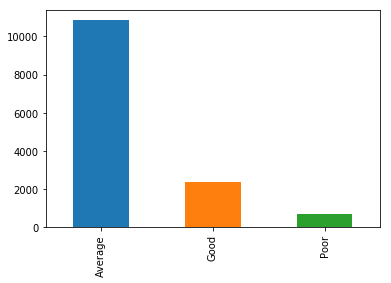

In [273]:
combined.Rating_Cat.value_counts().plot(kind = "bar")

In [276]:
combined.groupby("Rating_Cat")["Delivery_Time"].value_counts()

Rating_Cat  Delivery_Time
Average     30 minutes       6232
            45 minutes       1780
            65 minutes        586
            120 minutes        37
            20 minutes         16
            80 minutes          7
            10 minutes          4
Good        30 minutes        876
            45 minutes        742
            65 minutes        270
            120 minutes        12
            80 minutes          7
            20 minutes          3
Poor        30 minutes        298
            45 minutes        143
            65 minutes         67
            120 minutes        13
            20 minutes          1
Name: Delivery_Time, dtype: int64

### Finding if Rating has an impact on Delivery Time

### H0: The Rating has no impact on Delivery Time or vice versa.

### H1: Delivery Time is influenced by the Rating

Test Performed - Since one column iun Numerical and Another Categorical and Hence the Test applied is F Test.

In [277]:
from statsmodels.formula.api import ols

In [278]:
import statsmodels.api as sms

In [279]:
combined.columns

Index(['Restaurant', 'Location', 'Cuisines', 'Average_Cost', 'Minimum_Order',
       'Rating', 'Votes', 'Reviews', 'Delivery_Time', 'Locs_Cleansed',
       'Cuisine_Cleansed', 'Rating_Cat'],
      dtype='object')

In [283]:
model = ols("Rating~Delivery_Time", data = combined).fit()

In [284]:
print(sms.stats.anova_lm(model))

                    df       sum_sq   mean_sq          F        PR(>F)
Delivery_Time      6.0    51.471247  8.578541  62.727838  7.136598e-77
Residual       11087.0  1516.237260  0.136758        NaN           NaN


#### Inference

As we see that the Pvalue is less than 0.05 and hence we can conclude that we reject the Ho meaning that the Delivery Time is influenced by the Rating

In [286]:
new = combined.drop(["Restaurant", "Location", "Cuisines"], axis = 1)

In [287]:
new.head()

,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time,Locs_Cleansed,Cuisine_Cleansed,Rating_Cat
0,200.0,50,3.5,12.0,4.0,30 minutes,Pune,FastFood,Average
1,100.0,50,3.5,11.0,4.0,30 minutes,Bangalore,Deserts,Average
2,150.0,50,3.6,99.0,30.0,65 minutes,Mumbai,Main Course,Average
3,250.0,99,3.7,176.0,95.0,30 minutes,Noida,Main Course,Average
4,200.0,99,3.2,521.0,235.0,65 minutes,Bangalore,FastFood,Average


In [292]:
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13868 entries, 0 to 13867
Data columns (total 9 columns):
Average_Cost        13868 non-null float64
Minimum_Order       13868 non-null int32
Rating              13868 non-null float64
Votes               13868 non-null float64
Reviews             13868 non-null float64
Delivery_Time       11094 non-null object
Locs_Cleansed       13868 non-null object
Cuisine_Cleansed    13868 non-null object
Rating_Cat          13868 non-null object
dtypes: float64(4), int32(1), object(4)
memory usage: 921.0+ KB


In [293]:
# Bring it in train and test
newtrain = new.loc[:train.shape[0]-1]

In [295]:
newtrain.tail()

,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time,Locs_Cleansed,Cuisine_Cleansed,Rating_Cat
11089,250.0,50,4.2,326.0,189.0,30 minutes,Bangalore,Main Course,Good
11090,100.0,50,3.6,36.0,16.0,30 minutes,Noida,FastFood,Average
11091,100.0,50,3.5,45.0,18.0,30 minutes,Bangalore,Main Course,Average
11092,100.0,50,3.1,24.0,9.0,30 minutes,Bangalore,Main Course,Average
11093,100.0,50,3.6,63.0,26.0,30 minutes,Gurgaon,Main Course,Average


In [299]:
newtest = new.loc[11094:combined.shape[0]]

In [302]:
newtest.drop(['Delivery_Time'], axis=1, inplace = True)

C:\Users\It\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [303]:
newtest.columns

Index(['Average_Cost', 'Minimum_Order', 'Rating', 'Votes', 'Reviews',
       'Locs_Cleansed', 'Cuisine_Cleansed', 'Rating_Cat'],
      dtype='object')

In [304]:
newtrain.columns

Index(['Average_Cost', 'Minimum_Order', 'Rating', 'Votes', 'Reviews',
       'Delivery_Time', 'Locs_Cleansed', 'Cuisine_Cleansed', 'Rating_Cat'],
      dtype='object')

In [305]:
# Sklearn - LE
from sklearn.preprocessing import LabelEncoder

In [306]:
le = LabelEncoder()

In [308]:
newtrain["Delivery_TimeCat"] = le.fit_transform(newtrain.Delivery_Time)

C:\Users\It\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [310]:
newtrain.head()

,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time,Locs_Cleansed,Cuisine_Cleansed,Rating_Cat,Delivery_TimeCat
0,200.0,50,3.5,12.0,4.0,30 minutes,Pune,FastFood,Average,3
1,100.0,50,3.5,11.0,4.0,30 minutes,Bangalore,Deserts,Average,3
2,150.0,50,3.6,99.0,30.0,65 minutes,Mumbai,Main Course,Average,5
3,250.0,99,3.7,176.0,95.0,30 minutes,Noida,Main Course,Average,3
4,200.0,99,3.2,521.0,235.0,65 minutes,Bangalore,FastFood,Average,5


In [314]:
# Relation
pd.DataFrame(newtrain.groupby("Delivery_Time")["Delivery_TimeCat"].value_counts())

,,Delivery_TimeCat
Delivery_Time,Delivery_TimeCat,
10 minutes,0,4
120 minutes,1,62
20 minutes,2,20
30 minutes,3,7406
45 minutes,4,2665
65 minutes,5,923
80 minutes,6,14


In [342]:
def mapkardo(x):
    if(x==0):
        return("10 minutes")
    elif(x==1):
        return("120 minutes")
    elif(x ==2):
        return("20 minutes")
    elif(x==3):
        return("30 minutes")
    elif(x==4):
        return("45 minutes")
    elif(x==5):
        return("65 minutes")
    else:
        return("80 minutes")


In [319]:
# Delete Delivery Time
finaltrain = newtrain.drop("Delivery_Time", axis = 1)

In [322]:
scaled_train = pd.get_dummies(finaltrain)

In [323]:
scaled_test = pd.get_dummies(newtest)

In [325]:
# Standard Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [326]:
x = scaled_train.drop("Delivery_TimeCat", axis = 1)
y = scaled_train.Delivery_TimeCat

In [328]:
train_scaled = pd.DataFrame(sc.fit_transform(x), columns=x.columns)

In [331]:
test_scaled=pd.DataFrame(sc.transform(scaled_test), 
                         columns=scaled_test.columns)

### Modelling

1. Decision tree

In [332]:
from sklearn.tree import DecisionTreeClassifier

In [333]:
dtree = DecisionTreeClassifier(criterion="entropy")

In [348]:
pred = dtree.fit(train_scaled, y).predict(test_scaled)

In [349]:
solution = pd.DataFrame({"Delivery_Time":pred})

In [352]:
solution["Delivery_Time"] = solution.Delivery_Time.apply(mapkardo)

In [360]:
# Export as csv
solution.to_excel("DTREEMODEL.xlsx", index = False)

In [361]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(criterion = "entropy")

In [362]:
pred = rf.fit(train_scaled, y).predict(test_scaled)
solution = pd.DataFrame({"Delivery_Time":pred})
solution["Delivery_Time"] = solution.Delivery_Time.apply(mapkardo)
# Export as csv
solution.to_excel("RFMODEL.xlsx", index = False)

C:\Users\It\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
